___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_m = pd.read_csv("ANSUR II MALE Public.csv", encoding = "latin-1")
df_f = pd.read_csv("ANSUR II FEMALE Public.csv", encoding = "latin-1")

## Explore Data

In [7]:
df = pd.concat([df_m, df_f], ignore_index=True)

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [9]:
df.isnull().sum()

subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [11]:
df_object = df0.select_dtypes(include ="object").head()
df_object

#object features of the database

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand


In [13]:
for col in df_object:
    print(f"{col:<30}:", df0[col].nunique())
    
#how many unique item they have

Gender                        : 2
Date                          : 253
Installation                  : 12
Component                     : 3
Branch                        : 3
PrimaryMOS                    : 285
SubjectsBirthLocation         : 152
Ethnicity                     : 209
WritingPreference             : 3


In [14]:
df_object = df[['Gender', 'Date','Installation', 'Component','Branch','PrimaryMOS','SubjectsBirthLocation',
                'WritingPreference']]

In [15]:
df_object

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,Right hand
...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Right hand


In [16]:
df.drop(['subjectid','SubjectId','Ethnicity', 'Date', 'Installation', 'Component','PrimaryMOS','SubjectsBirthLocation',
                'WritingPreference'], axis=1, inplace=True)

In [17]:
df_object = df.select_dtypes(include ="object").head()
df_object

#object features of the database

,Gender,Branch
0,Male,Combat Arms
1,Male,Combat Support
2,Male,Combat Support
3,Male,Combat Service Support
4,Male,Combat Service Support


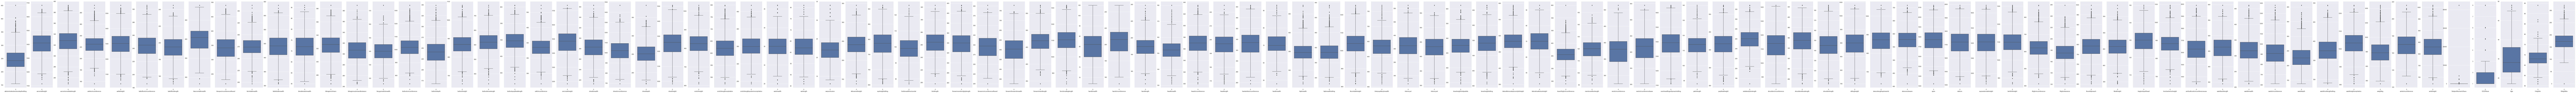

In [18]:
sns.set(rc={'figure.figsize':(350,12)})
fig, axs = plt.subplots(ncols=df.drop(df_object, axis=1).columns.size)
count = 0
for i in df.drop(df_object, axis=1).columns:
    gfg = sns.boxplot(data=df[i], whis=1.5, ax=axs[count])
    count +=1
    gfg.set(xlabel=i)


In [19]:
df.drop(df.loc[df['Weightlbs'] == 0].index, inplace=True)

In [20]:
df.drop(df.loc[df['Heightin'] == 94].index, inplace=True)

In [21]:
df['Age'].sort_values().head(20)

2785    17
5593    17
1415    18
2069    18
2068    18
5425    18
5426    18
2801    18
2805    18
2807    18
4929    18
4762    18
4926    18
2985    18
4925    18
4922    18
2754    18
5415    18
5410    18
2727    18
Name: Age, dtype: int64

**Let's see how many outliers are there of each Continuous Columns**

### My target column is `DODRace`. So let's take a close look at this column.

In [33]:
for i in df['DODRace'].unique() :
    print(f"the number of {i}--->{df[df['DODRace'] == i].shape[0]}")

the number of 1--->3792
the number of 2--->1297
the number of 3--->678
the number of 4--->188
the number of 5--->49
the number of 6--->59
the number of 8--->3


In [24]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality, we find the outliers for features without consideration of class distinction

def detect_outliers(df, col_name, tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [25]:
threshold = 1.5
out_cols = []
for col in df.columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols)        

abdominalextensiondepthsitting
lower:141.0 
upper:349.0        
outlier:46
*-*-*-*-*-*-*
acromialheight
lower:1182.0 
upper:1630.0        
outlier:17
*-*-*-*-*-*-*
acromionradialelength
lower:269.875 
upper:384.875        
outlier:36
*-*-*-*-*-*-*
anklecircumference
lower:182.5 
upper:266.5        
outlier:77
*-*-*-*-*-*-*
axillaheight
lower:1099.0 
upper:1499.0        
outlier:30
*-*-*-*-*-*-*
balloffootcircumference
lower:196.0 
upper:292.0        
outlier:18
*-*-*-*-*-*-*
balloffootlength
lower:156.5 
upper:232.5        
outlier:18
*-*-*-*-*-*-*
biacromialbreadth
lower:308.5 
upper:488.5        
outlier:3
*-*-*-*-*-*-*
bicepscircumferenceflexed
lower:222.5 
upper:458.5        
outlier:19
*-*-*-*-*-*-*
bicristalbreadth
lower:223.0 
upper:327.0        
outlier:58
*-*-*-*-*-*-*
bideltoidbreadth
lower:370.0 
upper:610.0        
outlier:10
*-*-*-*-*-*-*
bimalleolarbreadth
lower:56.0 
upper:88.0        
outlier:6
*-*-*-*-*-*-*
bitragionchinarc
lower:281.0 
upper:369.0        
outlier:48
*

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U6'), dtype('<U6')) -> None

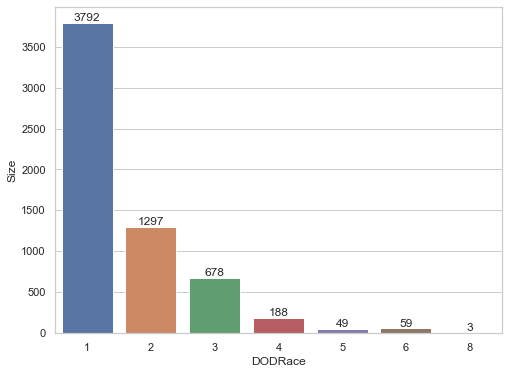

In [28]:
class_digit = df.groupby('DODRace').size()
class_label = pd.DataFrame(class_digit,columns = ['Size'])
plt.figure(figsize = (8,6))
ax= sns.barplot(x = class_label.index, y = 'Size', data = class_label)
plt.bar_label(ax.containers[0]);

- We can see that we have unbalanced data (`DODRace`). But, additionally I would like to check the distribution of each class of ``DODRace`` in terms of percentages.

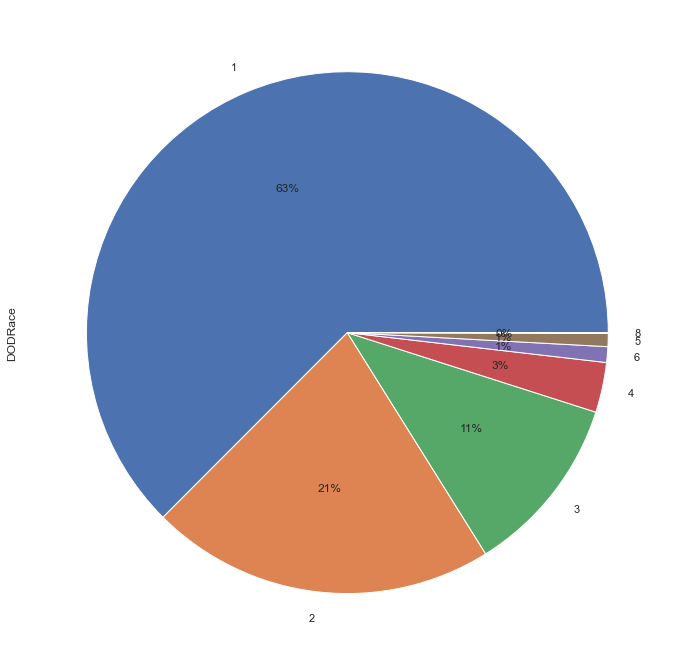

In [34]:
df["DODRace"].value_counts().plot.pie(autopct='%1.0f%%');

### Now, let's take a closer look at correlation of continuous columns.

In [37]:
df.corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
abdominalextensiondepthsitting,1.000000,0.360666,0.321759,0.524784,0.290845,0.459248,0.342077,0.421585,0.691656,0.506510,0.724653,0.371958,0.529148,0.621936,0.496944,0.741210,0.841606,0.258504,0.483281,0.333006,0.657335,0.346146,0.631124,0.826414,0.780464,0.304593,0.203354,0.467055,0.209619,0.247633,0.402119,0.132532,0.256379,0.282496,0.440475,0.354245,0.356206,0.629881,0.728726,0.317574,0.423854,0.426252,0.462892,0.311139,0.341128,0.370854,0.342328,0.509485,0.439064,0.597235,0.557660,0.268227,0.256539,0.603120,0.546488,0.288301,0.359547,0.235812,0.353916,0.673972,0.297912,0.658784,0.629576,0.329028,0.322217,0.163340,0.291157,0.640011,0.296531,0.192521,0.276945,0.429933,0.286741,0.327880,0.316900,0.361830,0.304121,0.732162,0.725437,0.396796,0.275060,0.183898,0.243953,0.729592,0.572040,0.859932,0.939904,0.958933,0.579314,0.162477,0.825766,0.550589,0.389320,0.021200,-0.079154,0.380780,0.301058,0.795286
acromialheight,0.360666,1.000000,0.872571,0.512336,0.987454,0.693360,0.802888,0.735512,0.529241,0.409158,0.633004,0.705558,0.569284,0.581502,0.478277,0.302275,0.355957,0.870786,0.817941,0.755766,0.413757,0.984231,0.549605,0.538326,0.293718,0.960099,0.901547,0.353605,0.421328,0.365927,0.433971,0.268859,0.282439,0.813082,0.667230,0.830777,0.849708,0.640252,0.578104,0.866301,0.895314,0.711778,0.719035,0.758207,0.380761,0.442407,0.560616,0.800836,0.449497,0.227347,0.122039,0.934185,0.335478,0.531874,0.595781,0.899029,0.933630,0.860720,0.683194,0.337433,0.543278,0.630515,0.654950,0.869289,0.716977,0.895696,0.825679,0.693371,0.892299,0.543258,0.820625,0.874854,0.882940,0.886478,0.980271,0.985018,0.946932,0.294313,0.456735,0.807091,0.893157,0.319074,0.886773,0.739331,0.729328,0.446747,0.413166,0.371984,0.604940,0.933248,0.684567,0.734602,0.922690,-0.002784,-0.235412,0.078193,0.947114,0.704370
acromionradialelength,0.321759,0.872571,1.000000,0.424667,0.862153,0.606104,0.734390,0.672221,0.461197,0.351548,0.566785,0.617121,0.518384,0.512835,0.425328,0.265863,0.306553,0.821070,0.783795,0.745159,0.357766,0.869877,0.475422,0.479233,0.278688,0.846256,0.855747,0.259465,0.320497,0.319169,0.365656,0.227312,-0.010985,0.641993,0.584367,0.756587,0.822737,0.563554,0.508783,0.841289,0.825005,0.630335,0.637481,0.725924,0.327374,0.400768,0.499396,0.715444,0.440204,0.200770,0.104680,0.8

In [38]:
df_object.sample()

,Gender,Branch
4,Male,Combat Service Support


In [38]:
df['DODRace'].value_counts()

1    3792
2    1297
3     678
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [39]:
df.drop(df.loc[df['DODRace'] == 4].index, inplace=True)
df.drop(df.loc[df['DODRace'] == 5].index, inplace=True)
df.drop(df.loc[df['DODRace'] == 6].index, inplace=True)
df.drop(df.loc[df['DODRace'] == 8].index, inplace=True)

In [40]:
df['DODRace'].value_counts()

1    3792
2    1297
3     678
Name: DODRace, dtype: int64

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [42]:
X = df.drop('DODRace',axis=1)
y = df['DODRace']

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (4613, 99)
Train target shape   :  (4613,)
Test features shape  :  (1154, 99)
Test target shape    :  (1154,)


In [44]:
cat = ['Gender','Branch']

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [121]:
log_model = LogisticRegression(max_iter=10000)

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = MinMaxScaler()

In [51]:
operations = [("OrdinalEncoder", column_trans),("scaler", MinMaxScaler()),("logistic", LogisticRegression(max_iter=100000, n_jobs=-1))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])])),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression(max_iter=100000, n_jobs=-1))])

In [52]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [53]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[9.92233463e-01, 4.46958103e-04, 7.31957929e-03],
       [9.69483306e-01, 3.49968129e-03, 2.70170126e-02],
       [9.63095565e-01, 2.78658446e-02, 9.03859074e-03],
       ...,
       [9.05480980e-01, 1.88601682e-02, 7.56588518e-02],
       [9.85103842e-01, 4.31938432e-03, 1.05767735e-02],
       [5.18156262e-01, 1.39535364e-01, 3.42308375e-01]])

In [54]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectNumericRace,Age,Heightin,Weightlbs,DODRace
3448,287,1489,361,238,1373,276,199,417,389,306,525,79,340,326,150,1108,258,912,643,528,420,1579,326,1122,267,1316,873,654,336,40,71,29,252,845,113,269,348,326,625,492,1169,98,238,200,155,576,204,344,76,378,424,1066,695,453,471,527,586,517,77,435,127,440,480,1395,117,462,269,1210,387,143,955,920,616,1855,1826,1489,1160,678,182,821,499,130,941,1754,508,378,1082,276,417,1087,1028,192,903,Male,Combat Service Support,1,46,74,220,1
2312,295,1496,334,258,1366,274,213,435,427,305,555,86,337,315,150,1157,280,922,644,518,452,1570,322,1172,280,1351,868,680,355,38,67,23,325,851,109,283,343,361,672,481,1225,96,234,194,165,599,204,370,78,368,421,1100,655,471,475,509,572,505,81,479,120,425,463,1479,119,437,273,1262,360,150,975,929,601,1867,1819,1509,1145,728,214,854,483,132,904,1770,500,386,1105,281,425,1078,1158,200,911,Male,Combat Arms,1,23,73,250,1
2742,256,1514,351,232,1397,249,212,415,406,277,518,77,329,305,134,1006,229,965,659,540,408,1606,292,1083,268,1396,948,633,350,35,66,16,236,807,98,280,345,326,614,491,1207,90,210,202,152,594,207,337,70,341,386,1132,620,370,396,540,598,544,73,413,138,395,428,1426,120,477,271,1178,381,151,936,928,620,1880,1866,1527,1216,618,177,803,512,133,984,1658,476,340,958,238,392,1144,918,178,902,Male,Combat Service Support,1,25,75,205,1
5932,218,1380,302,218,1272,229,182,355,263,275,420,69,306,276,133,1001,216,839,584,486,347,1453,256,893,246,1201,804,646,360,35,60,18,279,787,94,250,303,252,463,424,1043,78,186,170,153,586,195,313,65,352,396,1016,625,347,370,452,521,482,64,384,112,317,370,1323,106,405,234,934,327,138,904,785,533,1604,1675,1365,1079,587,155,708,449,134,854,1606,463,306,840,211,368,1007,636,154,847,Female,Combat Arms,1,27,67,140,1
2192,210,1462,337,200,1363,227,192,405,307,262,490,70,323,305,137,918,194,887,611,504,347,1535,291,983,233,1330,871,572,345,31,60,19,243,804,94,260,339,290,518,470,1160,87,207,190,152,555,194,333,70,317,337,1085,580,415,430,490,545,497,77,358,121,353,401,1459,111,431,257,1121,366,155,925,880,586,1823,1774,1465,1137,557,170,862,471,125,916,1554,469,301,832,201,376,1079,680,164,863,Male,Combat Arms,1,22,70,150,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [55]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectNumericRace,Age,Heightin,Weightlbs,DODRace,pred_proba
3448,287,1489,361,238,1373,276,199,417,389,306,525,79,340,326,150,1108,258,912,643,528,420,1579,326,1122,267,1316,873,654,336,40,71,29,252,845,113,269,348,326,625,492,1169,98,238,200,155,576,204,344,76,378,424,1066,695,453,471,527,586,517,77,435,127,440,480,1395,117,462,269,1210,387,143,955,920,616,1855,1826,1489,1160,678,182,821,499,130,941,1754,508,378,1082,276,417,1087,1028,192,903,Male,Combat Service Support,1,46,74,220,1,0.000447
2312,295,1496,334,258,1366,274,213,435,427,305,555,86,337,315,150,1157,280,922,644,518,452,1570,322,1172,280,1351,868,680,355,38,67,23,325,851,109,283,343,361,672,481,1225,96,234,194,165,599,204,370,78,368,421,1100,655,471,475,509,572,505,81,479,120,425,463,1479,119,437,273,1262,360,150,975,929,601,1867,1819,1509,1145,728,214,854,483,132,904,1770,500,386,1105,281,425,1078,1158,200,911,Male,Combat Arms,1,23,73,250,1,0.003500
2742,256,1514,351,232,1397,249,212,415,406,277,518,77,329,305,134,1006,229,965,659,540,408,1606,292,1083,268,1396,948,633,350,35,66,16,236,807,98,280,345,326,614,491,1207,90,210,202,152,594,207,337,70,341,386,1132,620,370,396,540,598,544,73,413,138,395,428,1426,120,477,271,1178,381,151,936,928,620,1880,1866,1527,1216,618,177,803,512,133,984,1658,476,340,958,238,392,1144,918,178,902,Male,Combat Service Support,1,25,75,205,1,0.027866
5932,218,1380,302,218,1272,229,182,355,263,275,420,69,306,276,133,1001,216,839,584,486,347,1453,256,893,246,1201,804,646,360,35,60,18,279,787,94,250,303,252,463,424,1043,78,186,170,153,586,195,313,65,352,396,1016,625,347,370,452,521,482,64,384,112,317,370,1323,106,405,234,934,327,138,904,785,533,1604,1675,1365,1079,587,155,708,449,134,854,1606,463,306,840,211,368,1007,636,154,847,Female,Combat Arms,1,27,67,140,1,0.002035
2192,210,1462,337,200,1363,227,192,405,307,262,490,70,323,305,137,918,194,887,611,504,347,1535,291,983,233,1330,871,572,345,31,60,19,243,804,94,260,339,290,518,470,1160,87,207,190,152,555,194,333,70,317,337,1085,580,415,430,490,545,497,77,358,121,353,401,1459,111,431,257,1121,366,155,925,880,586,1823,1774,1465,1137,557,170,862,471,125,916,1554,469,301,832,201,376,1079,680,164,863,Male,Combat Arms,1,22,70,150,1,0.002868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [56]:
test_data["pred"] = y_pred
test_data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectNumericRace,Age,Heightin,Weightlbs,DODRace,pred_proba,pred
3448,287,1489,361,238,1373,276,199,417,389,306,525,79,340,326,150,1108,258,912,643,528,420,1579,326,1122,267,1316,873,654,336,40,71,29,252,845,113,269,348,326,625,492,1169,98,238,200,155,576,204,344,76,378,424,1066,695,453,471,527,586,517,77,435,127,440,480,1395,117,462,269,1210,387,143,955,920,616,1855,1826,1489,1160,678,182,821,499,130,941,1754,508,378,1082,276,417,1087,1028,192,903,Male,Combat Service Support,1,46,74,220,1,0.000447,1
2312,295,1496,334,258,1366,274,213,435,427,305,555,86,337,315,150,1157,280,922,644,518,452,1570,322,1172,280,1351,868,680,355,38,67,23,325,851,109,283,343,361,672,481,1225,96,234,194,165,599,204,370,78,368,421,1100,655,471,475,509,572,505,81,479,120,425,463,1479,119,437,273,1262,360,150,975,929,601,1867,1819,1509,1145,728,214,854,483,132,904,1770,500,386,1105,281,425,1078,1158,200,911,Male,Combat Arms,1,23,73,250,1,0.003500,1
2742,256,1514,351,232,1397,249,212,415,406,277,518,77,329,305,134,1006,229,965,659,540,408,1606,292,1083,268,1396,948,633,350,35,66,16,236,807,98,280,345,326,614,491,1207,90,210,202,152,594,207,337,70,341,386,1132,620,370,396,540,598,544,73,413,138,395,428,1426,120,477,271,1178,381,151,936,928,620,1880,1866,1527,1216,618,177,803,512,133,984,1658,476,340,958,238,392,1144,918,178,902,Male,Combat Service Support,1,25,75,205,1,0.027866,1
5932,218,1380,302,218,1272,229,182,355,263,275,420,69,306,276,133,1001,216,839,584,486,347,1453,256,893,246,1201,804,646,360,35,60,18,279,787,94,250,303,252,463,424,1043,78,186,170,153,586,195,313,65,352,396,1016,625,347,370,452,521,482,64,384,112,317,370,1323,106,405,234,934,327,138,904,785,533,1604,1675,1365,1079,587,155,708,449,134,854,1606,463,306,840,211,368,1007,636,154,847,Female,Combat Arms,1,27,67,140,1,0.002035,1
2192,210,1462,337,200,1363,227,192,405,307,262,490,70,323,305,137,918,194,887,611,504,347,1535,291,983,233,1330,871,572,345,31,60,19,243,804,94,260,339,290,518,470,1160,87,207,190,152,555,194,333,70,317,337,1085,580,415,430,490,545,497,77,358,121,353,401,1459,111,431,257,1121,366,155,925,880,586,1823,1774,1465,1137,557,170,862,471,125,916,1554,469,301,832,201,376,1079,680,164,863,Male,Combat Arms,1,22,70,150,1,0.002868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [57]:
confusion_matrix(y_test,y_pred)

# confition_matrix sade gösterimidir. True label ve predicted label eksenleri gösterilmediğinden kafa karışıklığına 
# neden olabilir.

array([[709,  14,  12],
       [ 27, 235,   5],
       [ 92,  18,  42]], dtype=int64)

C:\Users\sebas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


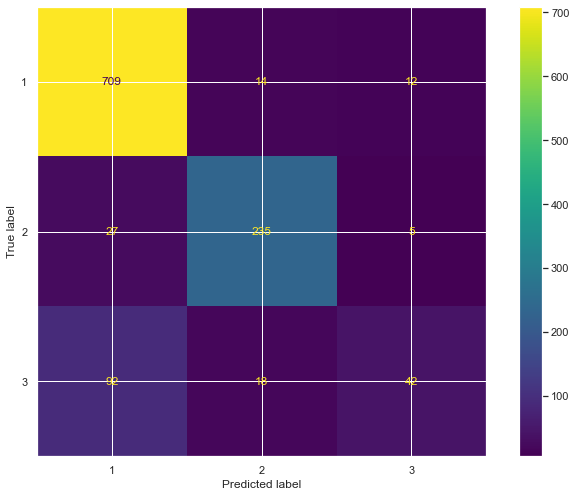

In [58]:
#manuel prediction yapmadan bu fonksiyonun çalıştığından bahset
plot_confusion_matrix(pipe_model, X_test, y_test);

# True label ve predicted label eksenleri gösterildiğinden yorumlanması daha kolaydır.
# TP, FP, TN, FN confition matrix üzerinden çıkarılır.

In [59]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# hem train hem de test seti scorlarını gözlemleyebilmek için eval_metrc fornksiyonumuzu tanımlıyoruz.

In [60]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[709  14  12]
 [ 27 235   5]
 [ 92  18  42]]
              precision    recall  f1-score   support

           1       0.86      0.96      0.91       735
           2       0.88      0.88      0.88       267
           3       0.71      0.28      0.40       152

    accuracy                           0.85      1154
   macro avg       0.82      0.71      0.73      1154
weighted avg       0.84      0.85      0.83      1154


Train_Set
[[2969   38   50]
 [  77  939   14]
 [ 311   54  161]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.93      3057
           2       0.91      0.91      0.91      1030
           3       0.72      0.31      0.43       526

    accuracy                           0.88      4613
   macro avg       0.84      0.73      0.76      4613
weighted avg       0.87      0.88      0.87      4613



## Cross Validation

In [61]:
import sklearn
sklearn.metrics.SCORERS.keys()

# classification modelleri için yapacağımız cross_validation ve gridsearchcv için kullanacağımız metriclerin
# listesi. Bu listeden kullanacağım 'accuracy', 'precision','recall','f1' metriclerini alıyorum sadece.

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [62]:
model = Pipeline(steps=operations)

scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=['balanced_accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    cv=10,
    return_train_score=True,
    n_jobs=-1)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

# cross_validation üzerinden kesin overfiting/underfiting kararını verebilmek için her iterasyonda hem train hem de validation
# seti scorlarını karşılaştırabilmek için return_train_score=True olarak düzenliyoruz.

# Eğer datamıza scaling işlemi uyguladıysak Data leakegeyi engellemek için CV ve gridsearch işlemlerinde mutlaka pipeline
# kullanmamız gerektiğini unutmuyoruz.

# Aşağıda döndürülen scorlar her zaman 1 clasına ait scorlardır. 0 clasına ait metriclerin CV scorları için ilave
# başka işlemler yapmamız gerekiyor. Sonraki derste örneği gösterilecektir.

,fit_time,score_time,test_balanced_accuracy,train_balanced_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro
1,0.803803,0.006526,0.719714,0.723352,0.826441,0.835032,0.719714,0.723352,0.746387,0.748204
2,0.785208,0.009536,0.743091,0.724159,0.828501,0.838425,0.743091,0.724159,0.765202,0.749846
3,0.756123,0.009537,0.726219,0.727995,0.823911,0.837291,0.726219,0.727995,0.751418,0.754768
4,0.783733,0.009549,0.736711,0.720233,0.858534,0.832476,0.736711,0.720233,0.766776,0.743847
5,0.739065,0.008533,0.673698,0.729679,0.790116,0.833490,0.673698,0.729679,0.683878,0.754961
6,0.757114,0.008526,0.689536,0.731141,0.769723,0.846717,0.689536,0.731141,0.704863,0.757796
7,0.840516,0.009531,0.673698,0.732261,0.769529,0.844736,0.673698,0.732261,0.680173,0.759978
8,0.814938,0.008529,0.789041,0.717960,0.857853,0.835187,0.789041,0.717960,0.815606,0.741708
9,0.757112,0.008536,0.670538,0.726412,0.857020,0.839735,0.670538,0.726412,0.688128,0.752054
10,0.706956,0.007531,0.679570,0.732542,0.760618,0.841068,0.679570,0.732542,0.693531,0.758423


In [63]:
df_scores.mean()[2:]

# 1 labelına ait olan train ve validation scorları bu aşamada karşılaştırılıp kesin overfiting/undefiting kararı veriliyor.
# Aşağıdaki scorlara göre overfiting olmadığını söyleyebiliriz.

test_balanced_accuracy     0.710182
train_balanced_accuracy    0.726573
test_precision_macro       0.814224
train_precision_macro      0.838416
test_recall_macro          0.710182
train_recall_macro         0.726573
test_f1_macro              0.729596
train_f1_macro             0.752159
dtype: float64

### Logistic Model GridsearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

operations = [("OrdinalEncoder", column_trans),("scaler", StandardScaler()),("logistic", LogisticRegression(max_iter=100000, n_jobs=-1))]
model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.05, 0.1, 0.2, 5]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}

In [73]:
grid_model = GridSearchCV(model, param_grid = param_grid, cv=10, n_jobs=-1, return_train_score=True)

In [74]:
grid_model.fit(X_train,y_train)

C:\Users\sebas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sebas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sebas\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\sebas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty,

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Branch'])])),
                                       ('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=100000,
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.

In [75]:
grid_model.best_params_

{'logistic__C': 0.05, 'logistic__penalty': 'l2'}

In [76]:
y_pred = grid_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

C:\Users\sebas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


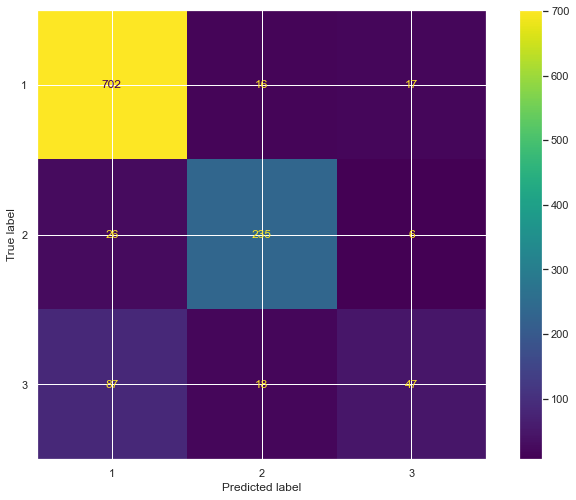

In [77]:
plot_confusion_matrix(grid_model, X_test, y_test)

In [78]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[702  16  17]
 [ 26 235   6]
 [ 87  18  47]]
              precision    recall  f1-score   support

           1       0.86      0.96      0.91       735
           2       0.87      0.88      0.88       267
           3       0.67      0.31      0.42       152

    accuracy                           0.85      1154
   macro avg       0.80      0.71      0.74      1154
weighted avg       0.84      0.85      0.84      1154


Train_Set
[[2968   34   55]
 [  66  951   13]
 [ 297   52  177]]
              precision    recall  f1-score   support

           1       0.89      0.97      0.93      3057
           2       0.92      0.92      0.92      1030
           3       0.72      0.34      0.46       526

    accuracy                           0.89      4613
   macro avg       0.84      0.74      0.77      4613
weighted avg       0.88      0.89      0.87      4613



## 2. SVC

### Vanilla SVC model 

In [79]:
from sklearn.svm import SVC

In [80]:
scaler = MinMaxScaler() # will be used later in pipeline

In [81]:
modelSVM =  SVC(kernel="rbf") # will be used later in pipeline

##### Alternatives

* modelSVM =  SVC(kernel="linear") 
* modelSVM = BaggingClassifier(SVC(),n_jobs=-1, max_samples=.1,n_estimators=10) # we drop the model computional complexity with bagging and that gives us better time complexity

In [82]:
from sklearn.pipeline  import Pipeline

modelSVM = Pipeline([("OrdinalEncoder", column_trans),("scaler",scaler),("SVM",modelSVM)]) # pipeline is used to combine the steps of the model

In [83]:
modelSVM.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])])),
                ('scaler', MinMaxScaler()), ('SVM', SVC())])

In [84]:
y_pred_test = modelSVM.predict(X_test)
y_pred_train = modelSVM.predict(X_train)

In [85]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.8431542461005199,
 0.8861911987860395,
 0.6704740190031419,
 0.7214079779381332)

In [86]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))


TEST CM
 [[721  12   2]
 [ 32 231   4]
 [114  17  21]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[3034   17    6]
 [  70  959    1]
 [ 385   46   95]]
TEST REPORT 
               precision    recall  f1-score   support

           1      0.832     0.981     0.900       735
           2      0.888     0.865     0.877       267
           3      0.778     0.138     0.235       152

    accuracy                          0.843      1154
   macro avg      0.833     0.661     0.670      1154
weighted avg      0.838     0.843     0.807      1154

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           1      0.870     0.992     0.927      3057
           2      0.938     0.931     0.935      1030
           3      0.931     0.181     0.303       526

    accuracy                          0.886      4613
   macro avg      0.913     0.701     0.721      4613
weighted avg      0.8

###  SVC Model GridsearchCV

In [87]:
param_grid = {'SVM__C': np.linspace(1, 1.3, 10),
              'SVM__gamma' : ["scale", "auto"]    
            }

In [88]:
model = Pipeline([("OrdinalEncoder", column_trans),("scaler",scaler),("SVM", SVC(kernel="rbf"))]) 


svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              refit=True,
                              n_jobs=-1)

svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Branch'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('SVM', SVC())]),
             n_jobs=-1,
             param_grid={'SVM__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVM__gamma': ['scal

In [89]:
svm_model_grid.best_params_

{'SVM__C': 1.3, 'SVM__gamma': 'scale'}

In [90]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])])),
                ('scaler', MinMaxScaler()), ('SVM', SVC(C=1.3))])

In [91]:
y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

In [92]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.8457538994800693,
 0.8907435508345979,
 0.6857654886387468,
 0.7411907942078274)

In [93]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[720  12   3]
 [ 33 230   4]
 [109  17  26]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[3028   16   13]
 [  63  964    3]
 [ 365   44  117]]
TEST REPORT 
               precision    recall  f1-score   support

           1      0.835     0.980     0.902       735
           2      0.888     0.861     0.875       267
           3      0.788     0.171     0.281       152

    accuracy                          0.846      1154
   macro avg      0.837     0.671     0.686      1154
weighted avg      0.841     0.846     0.814      1154

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           1      0.876     0.991     0.930      3057
           2      0.941     0.936     0.939      1030
           3      0.880     0.222     0.355       526

    accuracy                          0.891      4613
   macro avg      0.899     0.716     0.741      4613
weighted avg      0.8

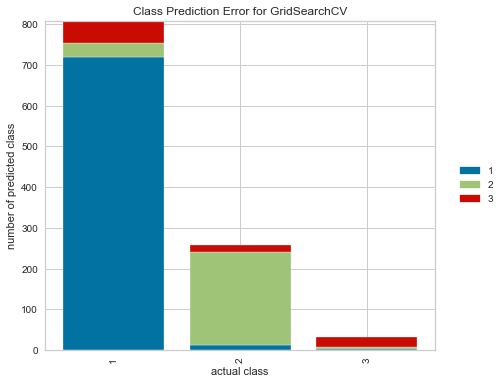

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [98]:
from yellowbrick.classifier import ClassPredictionError, ROCAUC
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()


- We can see from the plots that most of the classes are predicted correctly. But the model predicted 2 classes realtively bad.

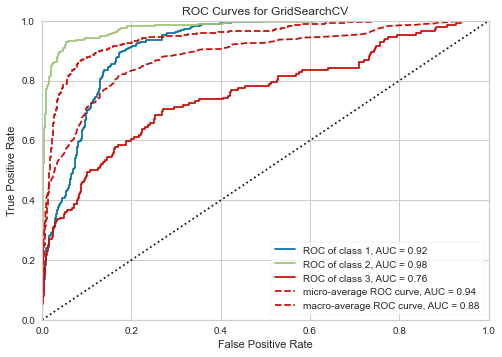

In [101]:
visualizer = ROCAUC(svm_model_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

## 3. RF

### Vanilla RF Model

In [102]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
rfc = RandomForestClassifier(n_estimators=100)

model = Pipeline([("OrdinalEncoder", column_trans),("scaler",scaler),("rfc", rfc)]) 

model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])])),
                ('scaler', MinMaxScaler()), ('rfc', RandomForestClassifier())])

In [103]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [102]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
rfc = RandomForestClassifier(n_estimators=100)

model = Pipeline([("OrdinalEncoder", column_trans),("scaler",scaler),("rfc", rfc)]) 

model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])])),
                ('scaler', MinMaxScaler()), ('rfc', RandomForestClassifier())])

In [103]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [104]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9272097053726169, 1.0, 0.8725916148783662, 1.0)

In [105]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[715   4  16]
 [  5 255   7]
 [ 27  25 100]]
              precision    recall  f1-score   support

           1      0.957     0.973     0.965       735
           2      0.898     0.955     0.926       267
           3      0.813     0.658     0.727       152

    accuracy                          0.927      1154
   macro avg      0.889     0.862     0.873      1154
weighted avg      0.924     0.927     0.925      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[3057    0    0]
 [   0 1030    0]
 [   0    0  526]]
              precision    recall  f1-score   support

           1      1.000     1.000     1.000      3057
           2      1.000     1.000     1.000      1030
           3      1.000     1.000     1.000       526

    accuracy                          1.000      4613
   macro avg      1.000     1.000     1.000      4613
weighted avg      1.000     1.000     1.000      4613



In [106]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

C:\Users\sebas\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Male'

### RF Model GridsearchCV

In [114]:
param_grid = {
             'rfc__criterion': ["entropy","gini"],
             'rfc__max_depth':[7,8,9],
             'rfc__max_features':['auto', 0.8, 0.7],
             'rfc__max_leaf_nodes': [160,180,200],
             'rfc__n_estimators':[50,100,150],
             }

In [115]:
rf_model = Pipeline([("OrdinalEncoder", column_trans),("scaler",scaler),("rfc", RandomForestClassifier(n_estimators=100))]) 

rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             refit=True,
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'Branch'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__criterion': ['entropy', 'gini'],
                         'rfc__max_depth': [7, 8, 9],
                         'rfc__max_features': ['auto', 0.8, 0.7],
             

In [116]:
rf_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'OrdinalEncoder', 'scaler', 'rfc', 'OrdinalEncoder__n_jobs', 'OrdinalEncoder__remainder', 'OrdinalEncoder__sparse_threshold', 'OrdinalEncoder__transformer_weights', 'OrdinalEncoder__transformers', 'OrdinalEncoder__verbose', 'OrdinalEncoder__verbose_feature_names_out', 'OrdinalEncoder__ordinalencoder', 'OrdinalEncoder__ordinalencoder__categories', 'OrdinalEncoder__ordinalencoder__dtype', 'OrdinalEncoder__ordinalencoder__handle_unknown', 'OrdinalEncoder__ordinalencoder__unknown_value', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'rfc__bootstrap', 'rfc__ccp_alpha', 'rfc__class_weight', 'rfc__criterion', 'rfc__max_depth', 'rfc__max_features', 'rfc__max_leaf_nodes', 'rfc__max_samples', 'rfc__min_impurity_decrease', 'rfc__min_samples_leaf', 'rfc__min_samples_split', 'rfc__min_weight_fraction_leaf', 'rfc__n_estimators', 'rfc__n_jobs', 'rfc__oob_score', 'rfc__random_state', 'rfc__verbose', 'rfc__warm_start'])

In [117]:
rf_grid_model.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': 8,
 'rfc__max_features': 0.8,
 'rfc__max_leaf_nodes': 200,
 'rfc__n_estimators': 150}

In [118]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [119]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9644714038128249,
 0.9876436158681986,
 0.9497605631621316,
 0.9803163659901569)

In [120]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[712  12  11]
 [  4 261   2]
 [  4   8 140]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[3014    6   37]
 [   4 1026    0]
 [   6    4  516]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           1      0.989     0.969     0.979       735
           2      0.929     0.978     0.953       267
           3      0.915     0.921     0.918       152

    accuracy                          0.964      1154
   macro avg      0.944     0.956     0.950      1154
weighted avg      0.965     0.964     0.965      1154

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           1      0.997     0.986     0.991      3057
           2      0.990     0.996     0.993      1030
           3      0.933     0.981     0.956       526

    accuracy                          0.988      4613
   macro avg  

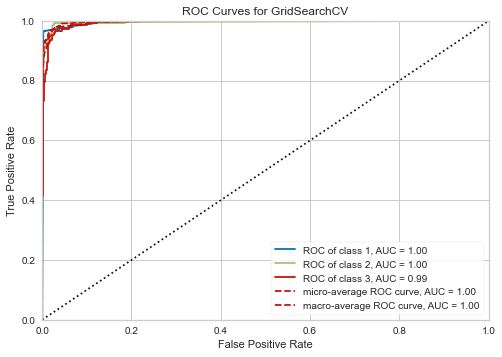

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [121]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

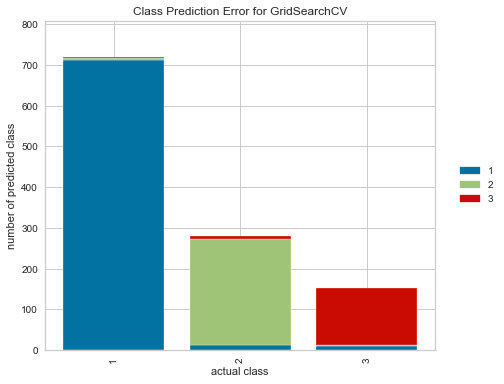

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [122]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

## 4. XGBoost

### Vanilla XGBoost Model

In [149]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)
le=LabelEncoder()

xgb_classifier = XGBClassifier()
model = Pipeline([("OrdinalEncoder", le),("xgb", xgb_classifier)]) 

In [153]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

NameError: name 'XGBRegressor' is not defined

In [152]:
model.fit(X_train, y_train)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [133]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [134]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_f1_train = f1_score(y_train, y_pred_train, average='macro')

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.012131715771230503, 1.0, 0.00969773891787712, 1.0)

In [135]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[  0   0   0   0]
 [714  10  11   0]
 [  2 261   4   0]
 [  7   7 138   0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[3057    0    0]
 [   0 1030    0]
 [   0    0  526]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0      0.000     0.000     0.000         0
           1      0.036     0.014     0.020       735
           2      0.026     0.015     0.019       267
           3      0.000     0.000     0.000       152

    accuracy                          0.012      1154
   macro avg      0.016     0.007     0.010      1154
weighted avg      0.029     0.012     0.017      1154

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0      1.000     1.000     1.000      3057
           1      1.000     1.000     1.000      1030
           2      1.000     1.000     

C:\Users\sebas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sebas\anaconda3\lib\site-packages\sklearn\metrics\_cla

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

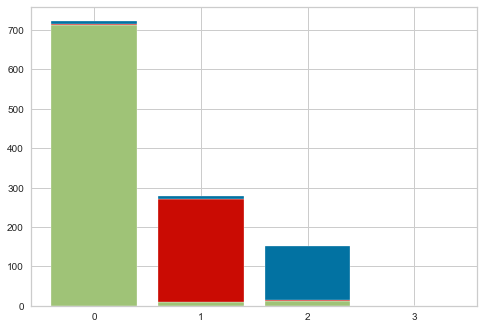

In [137]:
visualizer = ClassPredictionError(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### XGBoost Model GridsearchCV

In [156]:
# These hyperparamaters found after long trials. 
# You also can change and make some trials. 
# If you reach better scores, please let us know.
param_grid = {'n_estimators':[137],
             'learning_rate': [0.1890930861960677],
             'min_child_weight' : [2],
             'max_depth':[4],
             'subsample': [0.19171391113864972],
             'gamma': [0.016657026615236145],
             'colsample_bytree': [0.904782626896807],
             'reg_alpha' : [9.386969512581851e-06], 
             'reg_lambda' : [1.3162789863573587e-08]}

In [141]:
xgb_model =   XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model,
                             param_grid,
                             verbose=1,
                             scoring="accuracy",
                             refit=True,
                             n_jobs=-1)

xgb_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\sebas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sebas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sebas\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\sebas\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1497, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "C:\Users\sebas\anaconda3\lib\site-packages\xg

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Gender: object, Branch: object

In [158]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.904782626896807,
 'gamma': 0.016657026615236145,
 'learning_rate': 0.1890930861960677,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 137,
 'reg_alpha': 9.386969512581851e-06,
 'reg_lambda': 1.3162789863573587e-08,
 'subsample': 0.19171391113864972}

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 4,
 'min_split_loss': 1,
 'n_estimators': 200,
 'reg_lambda': 1,
 'subsample': 0.7}

In [159]:
y_pred_test = xgb_grid_model.predict(X_test)
y_pred_train = xgb_grid_model.predict(X_train)

In [160]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test, average='macro')
xgb_f1_train = f1_score(y_train, y_pred_train, average='macro')

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.9767103347889374,
 0.9984230955846677,
 0.9768064107036093,
 0.9984118296986333)

In [161]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[265   0   0   0   0   0   0   0   7   0]
 [  0 279   9   0   1   0   0   3   0   0]
 [  0   4 289   1   0   0   0   0   0   0]
 [  0   1   0 277   0   0   0   0   0   0]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   6   0 256   0   1   1   3]
 [  0   0   0   0   0   1 263   0   0   0]
 [  0   7   2   2   0   0   0 255   0   3]
 [  1   0   0   0   0   1   0   0 254   0]
 [  0   2   0   5   0   0   0   2   1 256]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[869   0   0   0   0   0   0   0   1   1]
 [  0 851   0   0   0   0   0   0   0   0]
 [  0   1 849   0   0   0   0   0   0   0]
 [  0   1   2 772   0   0   0   1   0   1]
 [  0   0   0   0 854   0   0   0   0   0]
 [  0   0   0   0   0 787   0   0   1   0]
 [  0   0   0   0   0   1 791   0   0   0]
 [  0   1   0   0   0   0   0 872   0   0]
 [  1   0   0   0   0   0   0   0 798   0]
 [  0   1   0   0   0   0   0   0   0 788]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

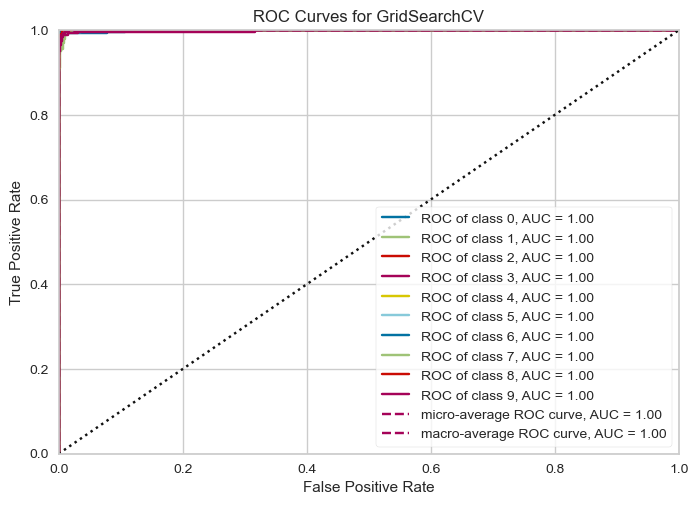

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [162]:
visualizer = ROCAUC(xgb_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data

visualizer.show()                       # Finalize and render the figure


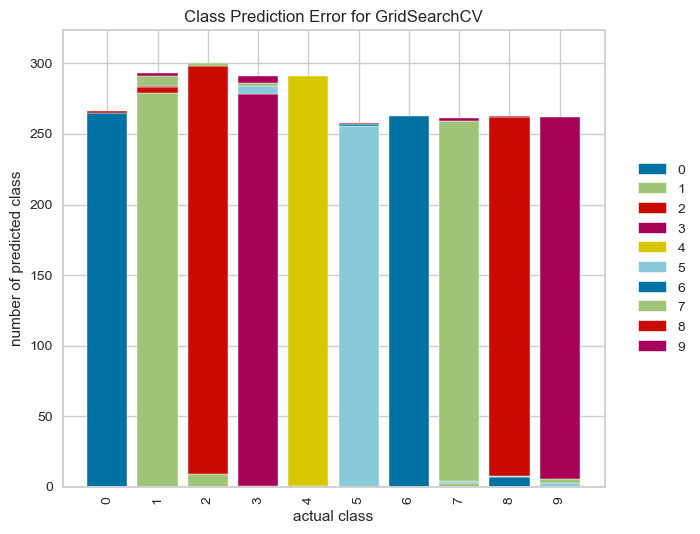

In [163]:
visualizer = ClassPredictionError(xgb_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

## 5. Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

## 6. Accuracy Comparison

Text(0.5, 1.0, 'Test Accuracy Score of Different Models')

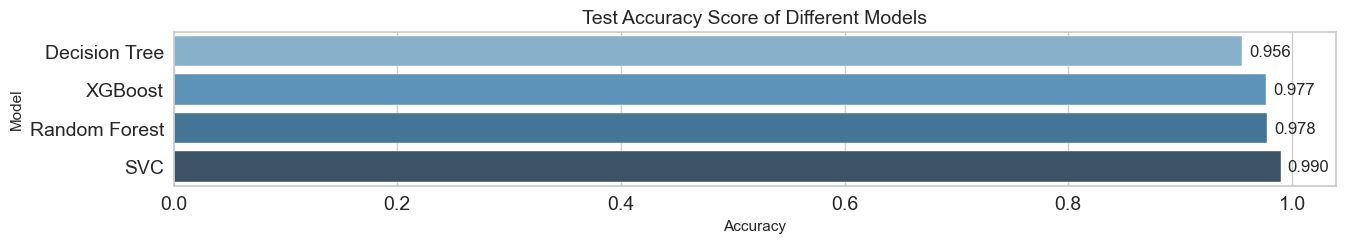

In [164]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [SVM_accuracy_test, rfc_accuracy_test, xgb_accuracy_test, modelTree_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')
# ax.bar_label(ax.containers[0], label_type='edge') # if you get an error for bar_label upgrade matplolib
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14)

## 7. F1 Score Comparison

Text(0.5, 1.0, 'Test F1 Score of Different Models')

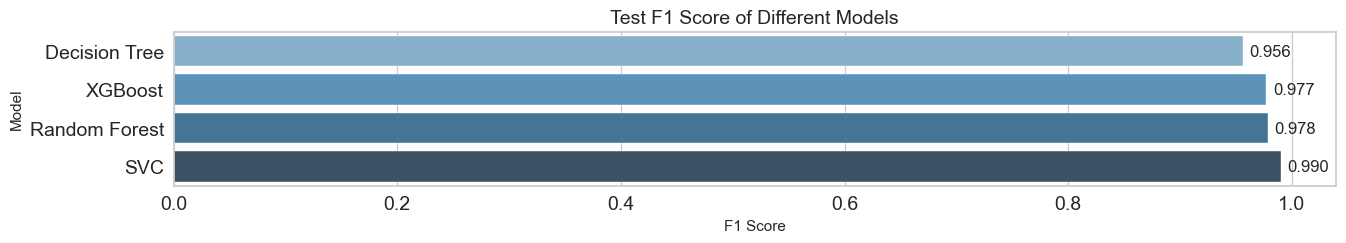

In [165]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest", "XGBoost", "Decision Tree"],
                        "F1 Score": [svm_f1_test, rfc_f1_test, xgb_f1_test, modelTree_f1_test]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + .9),
                xytext=(5, 10), textcoords='offset points')
# ax.bar_label(ax.containers[0], label_type='edge') # if you get an error for bar_label upgrade matplolib
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14)

# 8. Conclusion

- All four models has pretty  good scores. 
- SVM has the first place in terms of scores. 
- However, in the real world scenario, score not the only thing to consider.
- If you need explanable model, DT is the only option 
- We have around 1.7 sec. prediction time for SVM, on the other hand, Xgboost has around 0.1 sec. prediction time.
- In this context, which algorithm to choose for deployment is the subject of the business problem we plan to solve.

In [138]:
# These hyperparamaters found after long trials. 
# You also can change and make some trials. 
# If you reach# These hyperparamaters found after long trials. 
# You also can change and make some trials. 
# If you reach better scores, please let us know.
param_grid = {'n_estimators':[137],
             'learning_rate': [0.1890930861960677],
             'min_child_weight' : [2],
             'max_depth':[4],
             'subsample': [0.19171391113864972],
             'gamma': [0.016657026615236145],
             'colsample_bytree': [0.904782626896807],
             'reg_alpha' : [9.386969512581851e-06], 
             'reg_lambda' : [1.3162789863573587e-08]}
# These hyperparamaters found after long trials. 
# You also can change and make some trials. 
# If you reach better scores, please let us know.
param_grid = {'n_estimators':[137],
             'learning_rate': [0.1890930861960677],
             'min_child_weight' : [2],
             'max_depth':[4],
             'subsample': [0.19171391113864972],
             'gamma': [0.016657026615236145],
             'colsample_bytree': [0.904782626896807],
             'reg_alpha' : [9.386969512581851e-06], 
             'reg_lambda' : [1.3162789863573587e-08]}
 better scores, please let us know.
param_grid = {'n_estimators':[137],
             'learning_rate': [0.1890930861960677],
             'min_child_weight' : [2],
             'max_depth':[4],
             'subsample': [0.19171391113864972],
             'gamma': [0.016657026615236145],
             'colsample_bytree': [0.904782626896807],
             'reg_alpha' : [9.386969512581851e-06], 
             'reg_lambda' : [1.3162789863573587e-08]}

In [140]:
xgb_classifier = XGBClassifier()
model = Pipeline([("OrdinalEncoder", column_trans),("xgb", xgb_classifier)]) 
xgb_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=1,
                             scoring="accuracy",
                             refit=True,
                             n_jobs=-1)

xgb_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


ValueError: Invalid parameter colsample_bytree for estimator Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'Branch'])])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rou...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))]). Check the list of available parameters with `estimator.get_params().keys()`.

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7376215262514891

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___